In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
# Read Netflix dataset into DataFrame

data = pd.read_csv("netflix_titles.csv")

In [4]:
# Selecting columns containing the title, cast, category, and description for each TV show/movie

selected_columns = ['title', 'cast', 'listed_in', 'description']
selected_data = data[selected_columns].copy()

In [5]:
# Replace null values with empty string

selected_data.fillna('', inplace=True)

In [6]:
# Concatenating text from 'cast', 'listed_in', and 'description' columns

selected_data['combined_text'] = selected_data['cast'] + ' ' + selected_data['listed_in'] + ' ' + selected_data['description']

# Applying TF-IDF to convert text into numerical vectors

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(selected_data['combined_text'])

In [7]:
# Calculating cosine similarity matrix

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [9]:
# Using KMeans for clustering

k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(cosine_sim)

selected_data['cluster'] = kmeans.labels_

# Grouping titles by their clusters

clustered_titles = {}
for cluster_num in range(k):
    titles_in_cluster = selected_data[selected_data['cluster'] == cluster_num]['title'].tolist()[:10]
    clustered_titles[cluster_num] = titles_in_cluster

In [10]:
# Printing cluster number and the titles in each cluster

for cluster_num, titles in clustered_titles.items():
    print(f"Cluster {cluster_num}:")
    for title in titles:
        print(f"- {title}")
    print()

Cluster 0:
- My Little Pony: A New Generation
- Confessions of an Invisible Girl
- Go! Go! Cory Carson: Chrissy Takes the Wheel
- Chhota Bheem
- Nightbooks
- A StoryBots Space Adventure
- You vs. Wild: Out Cold
- Little Singham - Black Shadow
- Firedrake the Silver Dragon
- Show Dogs

Cluster 1:
- Midnight Mass
- Dear White People
- Tayo and Little Wizards
- Angry Birds
- He-Man and the Masters of the Universe
- Castle and Castle
- Nailed It
- Numberblocks
- Saved by the Bell
- The World's Most Amazing Vacation Rentals

Cluster 2:
- Sankofa
- Je Suis Karl
- Avvai Shanmughi
- Jeans
- Minsara Kanavu
- Ankahi Kahaniya
- The Father Who Moves Mountains
- King of Boys
- Tughlaq Durbar
- Tughlaq Durbar (Telugu)

Cluster 3:
- Lokillo: Nothing's the Same
- The Original Kings of Comedy
- Plastic Cup Boyz: Laughing My Mask Off!
- Revelations: The Masters of the Universe: Revelation Aftershow
- The Stand-Up
- Lee Su-geun: The Sense Coach
- Chelsea
- Alan Saldaña: Locked Up
- Bo Burnham: Inside
- S

In [11]:
# Creating a DataFrame with the title of the TV show/movie, cluster it belongs to, category, and description

clustered_dataframe = pd.DataFrame(columns=['title', 'cluster', 'cast', 'listed_in', 'description'])

for cluster_num, titles in clustered_titles.items():
    cluster_df = selected_data[selected_data['title'].isin(titles)][['title', 'cluster', 'cast', 'listed_in', 'description']]
    clustered_dataframe = pd.concat([clustered_dataframe, cluster_df])

clustered_dataframe.reset_index(drop=True, inplace=True)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
clustered_dataframe

,title,cluster,cast,listed_in,description
0,My Little Pony: A New Generation,0,"Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr",Children & Family Movies,"Equestria's divided. But a bright-eyed hero believes Earth Ponies, Pegasi and Unicorns should be pals — and, hoof to heart, she’s determined to prove it."
1,Confessions of an Invisible Girl,0,"Klara Castanho, Lucca Picon, Júlia Gomes, Marcus Bessa, Kiria Malheiros, Fernanda Concon, Gabriel Lima, Caio Cabral, Leonardo Cidade, Jade Cardozo","Children & Family Movies, Comedies","When the clever but socially-awkward Tetê joins a new school, she'll do anything to fit in. But the queen bee among her classmates has other ideas."
2,Go! Go! Cory Carson: Chrissy Takes the Wheel,0,"Maisie Benson, Paul Killam, Kerry Gudjohnsen, AC Lim",Children & Family Movies,"From arcade games to sled days and hiccup cures, Cory Carson’s curious little sister Chrissy speeds off on her own for fun and adventure all over town!"
3,Chhota Bheem,0,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil",Kids' TV,"A brave, energetic little boy with superhuman powers leads his friends on exciting adventures to guard their fellow Dholakpur villagers from evil."
4,Nightbooks,0,"Winslow Fegley, Lidya Jewett, Krysten Ritter",Children & Family Movies,Scary story fan Alex must tell a spine-tingling tale every night — or stay trapped with his new friend in a wicked witch's magical apartment forever.
5,A StoryBots Space Adventure,0,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, Fred Tatasciore, Evan Michael Lee, Jared Isaacman, Sian Proctor, Chris Sembroski, Hayley Arceneaux",Children & Family Movies,Join the StoryBots and the space travelers of the historic Inspiration4 mission as they search for answers to kids' questions about space.
6,You vs. Wild: Out Cold,0,"Bear Grylls, Jason Derek Prempeh",Children & Family Movies,"After a plane crash leaves Bear with amnesia, he must make choices to save the missing pilot and survive in this high-stakes interactive adventure."
7,Little Singham - Black Shadow,0,"Sumriddhi Shukla, Jigna Bharadwaj, Sonal Kaushal, Neshma Chemburkar, Ganesh Divekar, Annamaya Verma, Anamay Verma, Manoj Pandey","Children & Family Movies, Comedies",Kid cop Little Singham loses all his superpowers while trying to stop the demon Kaal’s new evil plans! Can his inner strength help him defeat the enemy?
8,Firedrake the Silver Dragon,0,"Thomas Brodie-Sangster, Felicity Jones, Freddie Highmore, Patrick Stewart, Meera Syal, Sanjeev Bhaskar, Nonso Anozie",Children & Family Movies,"When his home is threatened by humans, a young dragon summons the courage to seek a mythical paradise where dragons can live in peace and fly free."
9,Show Dogs,0,"Will Arnett, Ludacris, Natasha Lyonne, Stanley Tucci, Jordin Sparks, Gabriel Iglesias, Shaquille O'Neal, Omar Chaparro, Alan Cumming, Andy Beckwith, Delia Sheppard, Kerry Shale","Children & Family Movies, Comedies",A rough and tough police dog must go undercover with an FBI agent as a prim and proper pet at a dog show to save a baby panda from an illegal sale.


In [12]:
# Create a DataFrame with each row consisting of cluster number and its respective titles

cluster_titles_df = pd.DataFrame(list(clustered_titles.items()), columns=['Cluster', 'Titles'])

cluster_titles_df

,Cluster,Titles
0,0,"[My Little Pony: A New Generation, Confessions of an Invisible Girl, Go! Go! Cory Carson: Chrissy Takes the Wheel, Chhota Bheem, Nightbooks, A StoryBots Space Adventure, You vs. Wild: Out Cold, Little Singham - Black Shadow, Firedrake the Silver Dragon, Show Dogs]"
1,1,"[Midnight Mass, Dear White People, Tayo and Little Wizards, Angry Birds, He-Man and the Masters of the Universe, Castle and Castle, Nailed It, Numberblocks, Saved by the Bell, The World's Most Amazing Vacation Rentals]"
2,2,"[Sankofa, Je Suis Karl, Avvai Shanmughi, Jeans, Minsara Kanavu, Ankahi Kahaniya, The Father Who Moves Mountains, King of Boys, Tughlaq Durbar, Tughlaq Durbar (Telugu)]"
3,3,"[Lokillo: Nothing's the Same, The Original Kings of Comedy, Plastic Cup Boyz: Laughing My Mask Off!, Revelations: The Masters of the Universe: Revelation Aftershow, The Stand-Up, Lee Su-geun: The Sense Coach, Chelsea, Alan Saldaña: Locked Up, Bo Burnham: Inside, Soy Rada: Serendipity]"
4,4,"[The Starling, Intrusion, Grown Ups, Dark Skies, Paranoia, Chicago Party Aunt, The Stronghold, Birth of the Dragon, Jaws, Jaws 2]"
5,5,"[Squid Game, Hotel Del Luna, Hometown Cha-Cha-Cha, Bread Barbershop, The Crowned Clown, Touch Your Heart, Her Private Life, You Are My Spring, The 8th Night, Nevertheless,]"
6,6,"[Dick Johnson Is Dead, Europe's Most Dangerous Man: Otto Skorzeny in Spain, My Heroes Were Cowboys, Schumacher, Blood Brothers: Malcolm X & Muhammad Ali, The Women and the Murderer, If I Leave Here Tomorrow: A Film About Lynyrd Skynyrd, Untold: Breaking Point, Final Account, Rhyme & Reason]"
7,7,"[Jailbirds New Orleans, Raja Rasoi Aur Anya Kahaniyan, Countdown: Inspiration4 Mission to Space, Korean Cold Noodle Rhapsody, The Creative Indians, Cocaine Cowboys: The Kings of Miami, Explained, Heist, Cat People, Tales by Light]"
8,8,"[Kota Factory, Vendetta: Truth, Lies and The Mafia, Crime Stories: India Detectives, Falsa identidad, Jaguar, Monsters Inside: The 24 Faces of Billy Milligan, Love on the Spectrum, Too Hot To Handle: Latino, La casa de papel, Money Heist: From Tokyo to Berlin]"
9,9,"[Blood & Water, Ganglands, The Great British Baking Show, Bangkok Breaking, Resurrection: Ertugrul, Sex Education, The Smart Money Woman, Dharmakshetra, Stories by Rabindranath Tagore, Jack Whitehall: Travels with My Father]"


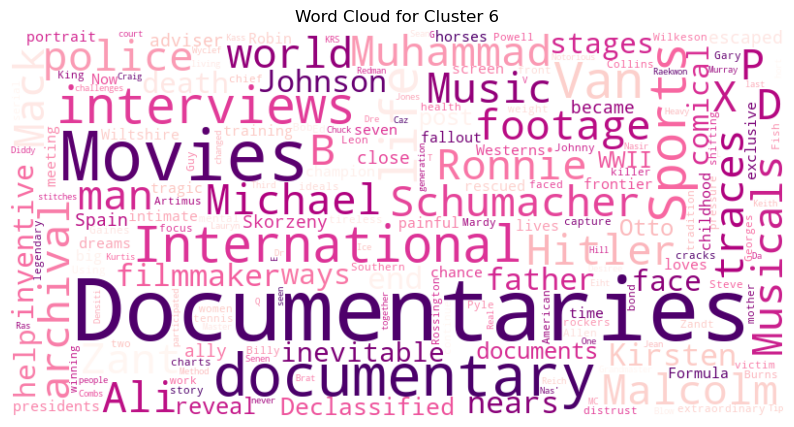

In [13]:
# Create a word cloud for Cluster 4 consisting of top words in combined text

target_cluster = 6  

titles = clustered_titles.get(target_cluster, [])

text = ' '.join(selected_data[selected_data['title'].isin(titles)]['combined_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='RdPu').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud for Cluster {target_cluster}')
plt.axis('off')
plt.show()